<a href="https://colab.research.google.com/github/smit977/data-analysis/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

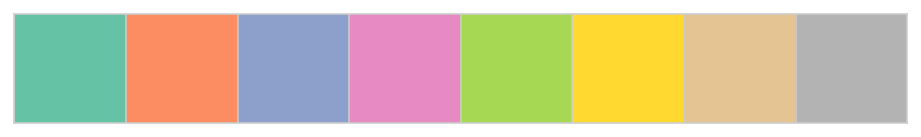

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import os
import itertools

sns.set_style('whitegrid')
sns.set_palette("Set2")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.palplot(sns.color_palette())


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv("/content/drive/My Drive/Colab/Attrition.csv")
# pd.set_option('display.max_columns', None,'display.max_rows',None)
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [4]:
df.shape


(1470, 35)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
df.info

<bound method DataFrame.info of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:

df.drop(['EmployeeCount','EmployeeNumber'],axis=1,inplace=True)


In [9]:
#Investigate categorical columns that seem irrelevent

df.Over18.value_counts()


Y    1470
Name: Over18, dtype: int64

In [10]:
df.drop('Over18',axis=1,inplace=True)


In [11]:
# Alter the Education column to show categorical variables. This will later be dummied for modelling.

df.replace({'Education':{1:'Below_college', 2:'College', 3:'Bachelor', 4:'Masters', 5:'Doctor'}}, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below_college,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Masters,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below_college,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below_college,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,80,0,17,3,2,9,6,0,8


In [12]:
#  Iterate through the dataframes columns and covert to lowercase for QoL. 
low_col = []
for i in df.columns:
    i = i.lower()
    low_col.append(i)
df.columns = low_col


In [13]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [14]:
df_dum = pd.get_dummies(df)
df_dum

,age,dailyrate,distancefromhome,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_No,attrition_Yes,businesstravel_Non-Travel,businesstravel_Travel_Frequently,businesstravel_Travel_Rarely,department_Human Resources,department_Research & Development,department_Sales,education_Bachelor,education_Below_college,education_College,education_Doctor,education_Masters,educationfield_Human Resources,educationfield_Life Sciences,educationfield_Marketing,educationfield_Medical,educationfield_Other,educationfield_Technical Degree,gender_Female,gender_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,overtime_No,overtime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [15]:
print(df.shape)
print(df_dum.shape)


(1470, 32)
(1470, 58)


In [16]:
# get_dummies has a drop_first parameter, which removes the first column created for each categorical variable which acts as a default, however we do not want this to be done for all of our columns, since this is a relatively  small dataset, i will do this manually.

df_dum.drop(['gender_Female','overtime_No','attrition_No'],axis=1,inplace=True)


In [17]:
#  Due to the presence of capital letters in the variables, once again iterate through and convert all the lowercase 
low_col = []
for i in df_dum.columns:
    i = i.lower()
    low_col.append(i)
df_dum.columns = low_col


In [18]:
#  At the moment, this column is categorical. For use in visualisations etc. this will need to be numeric, so lets convert Yes and No, into binary, or 1's and 0's

df.loc[df.attrition == 'Yes', 'attrition'] = 1
df.loc[df.attrition == 'No', 'attrition'] = 0


In [19]:
#Next, take a look at the value_counts to see the state of the target
df.attrition.value_counts()


0    1233
1     237
Name: attrition, dtype: int64

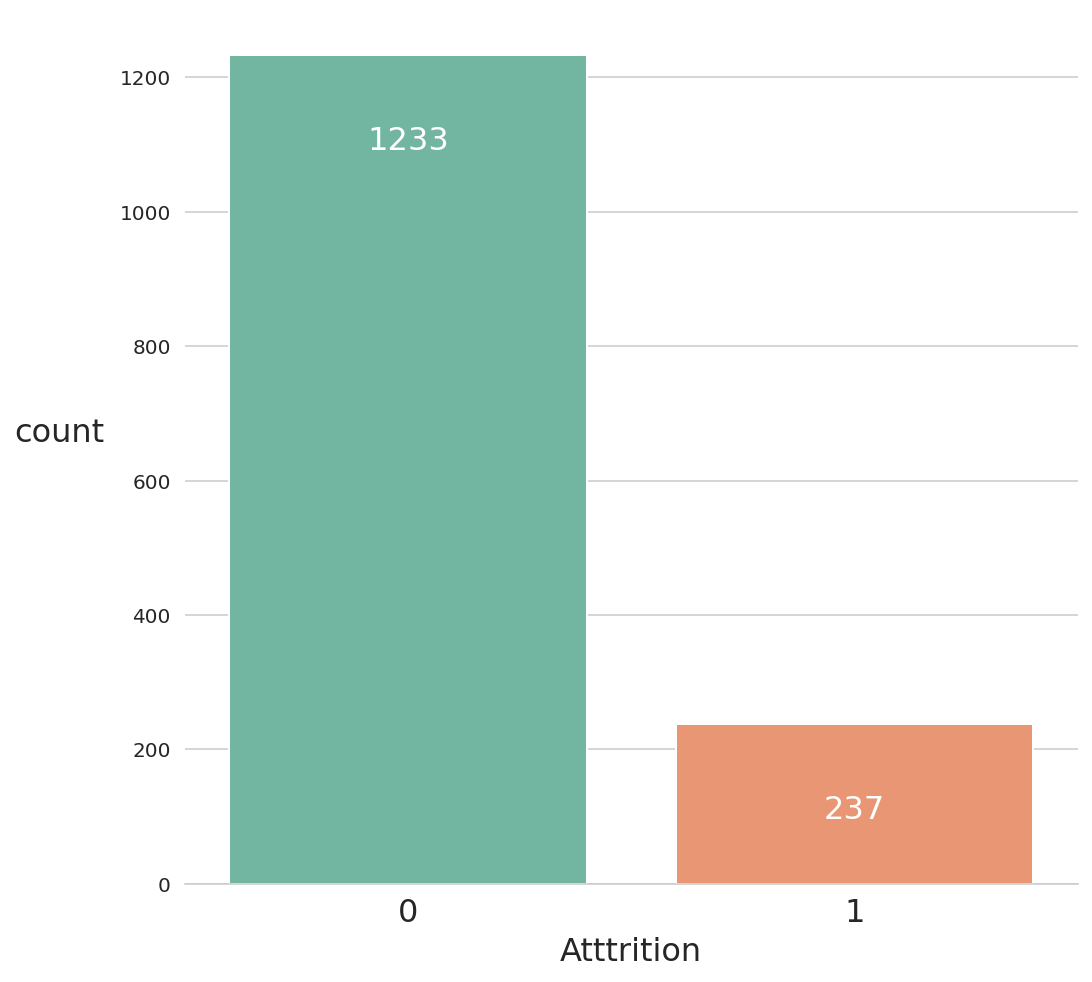

In [20]:
# Lets plot the target variable to make it easier to visualise. 
plt.figure(figsize=(8,8))

fig=sns.countplot(df.attrition)

sns.despine(left=True)

fig.set_xlabel('Atttrition',fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('count',fontsize=16,rotation=0)
fig.yaxis.labelpad = 30

plt.xticks(fontsize=16)

#  Add annotations on the plot to show the actual count values on each of the columns
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='white')
plt.show()


In [21]:
print('Percentage breakdown of Attrition')
print('-'*33)
round(df.attrition.value_counts(normalize=True)*100,2)


Percentage breakdown of Attrition
---------------------------------


0    83.88
1    16.12
Name: attrition, dtype: float64

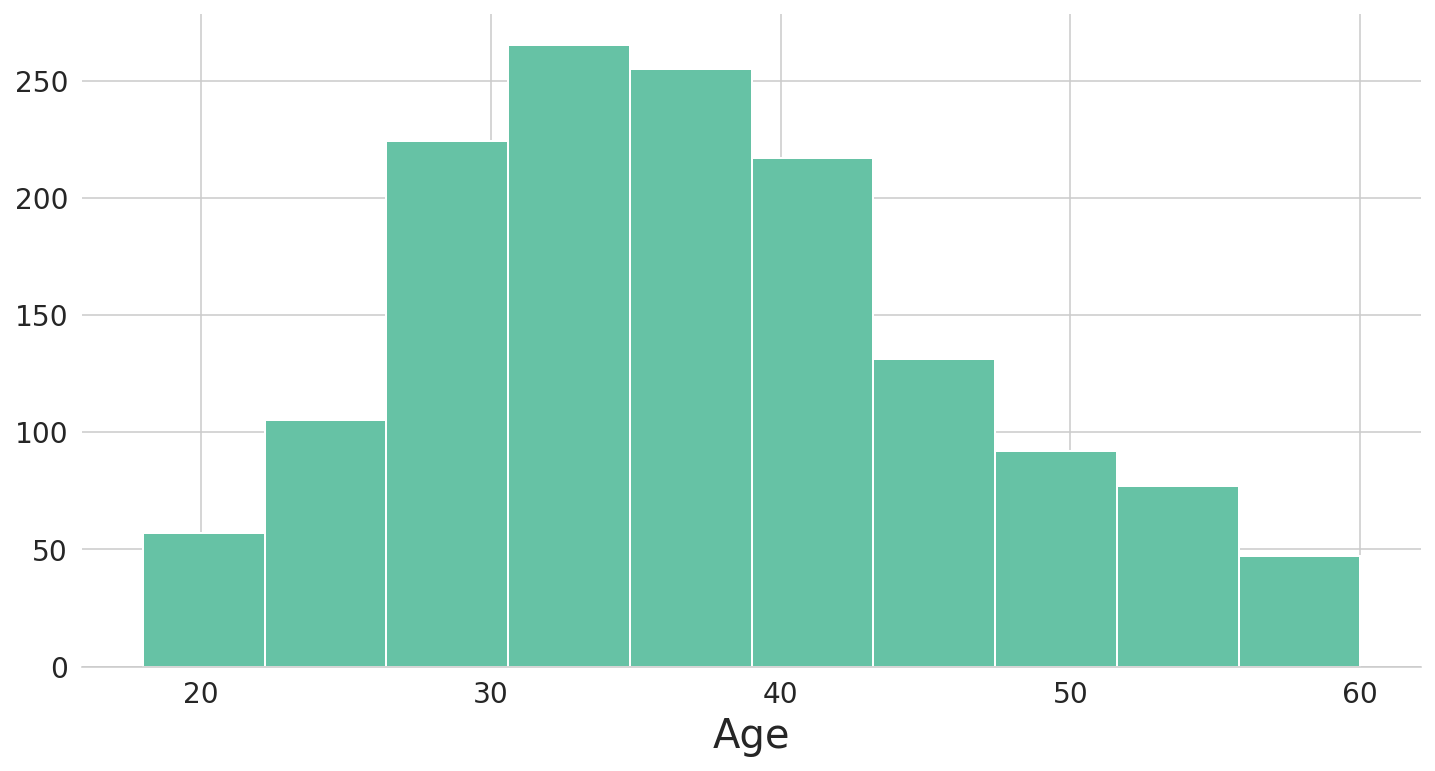

In [22]:
# Plot the distribution of Age

plt.figure(figsize=(12,6))
fig = sns.distplot(df.age,kde=False, bins=10, hist_kws=dict(alpha=1))
sns.despine(left=True)
fig.set_xlabel('Age',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.show()


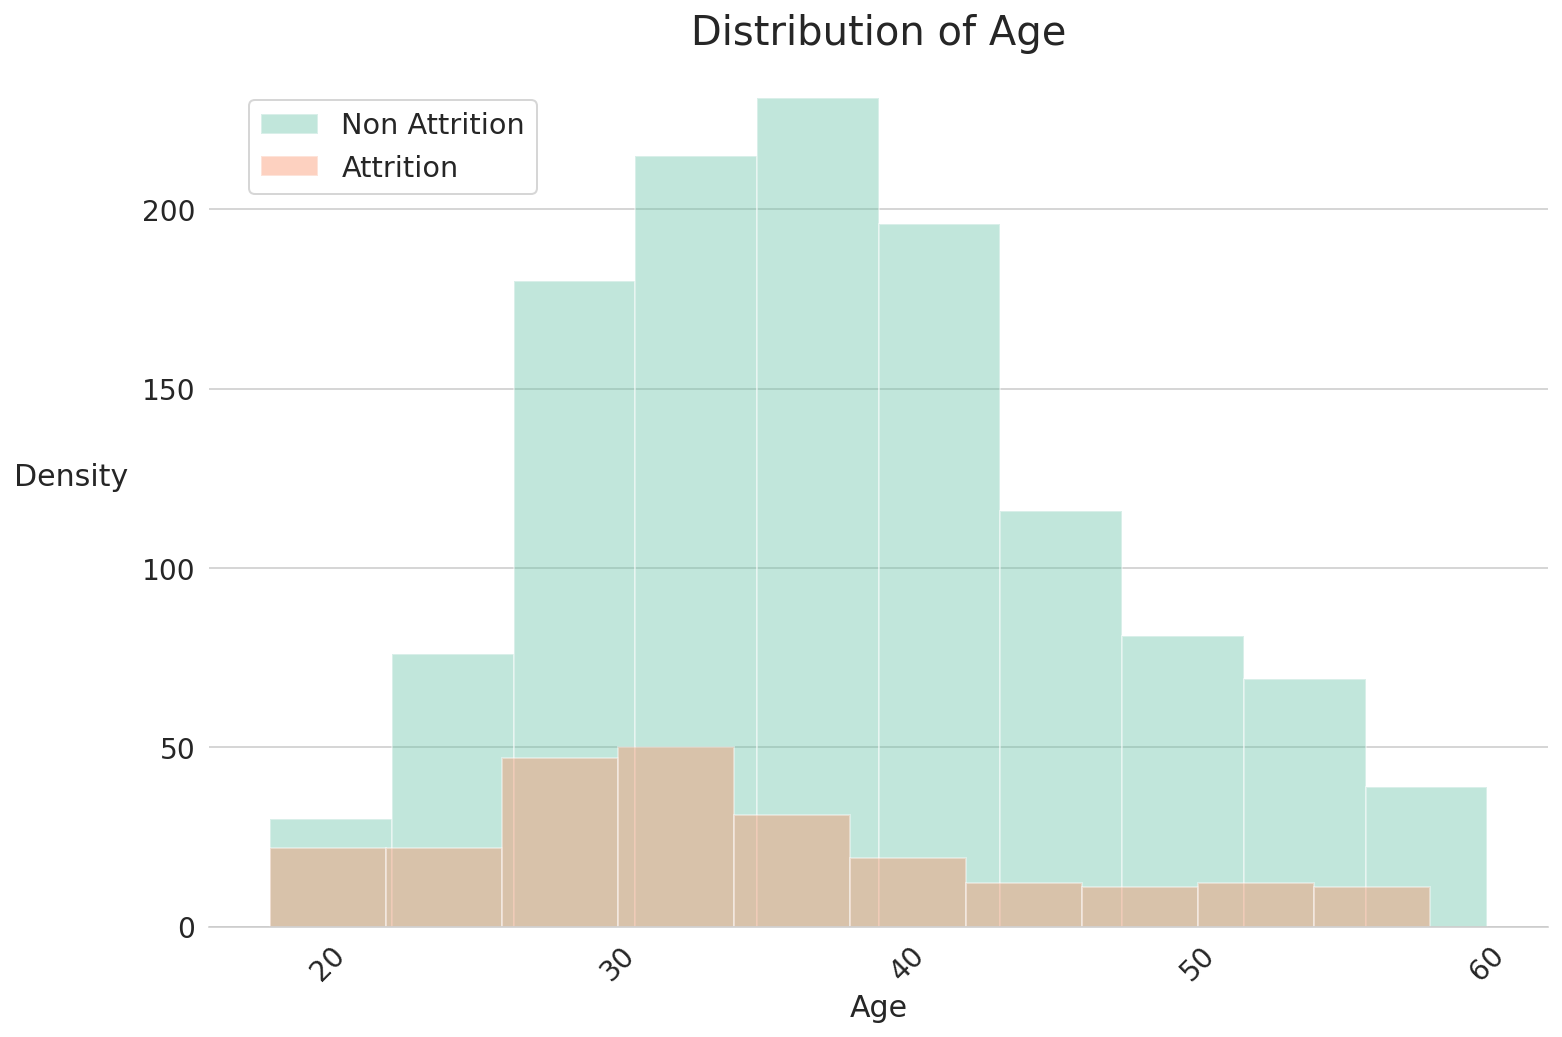

In [23]:
# Plot the distribution of Age where attrition is true and false

plt.figure(figsize=(12,8))

# Adjusting the bin size can alter the look of your graph, worth testing different sizes to see various plots
fig = sns.distplot(df[df['attrition'] == 0]['age'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['attrition'] == 1]['age'], label='Attrition', kde=0, bins=10)

sns.despine(left=1)


fig.grid(axis='x')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Age',fontsize=20);
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35

# Control the size and positioning of the legend
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()


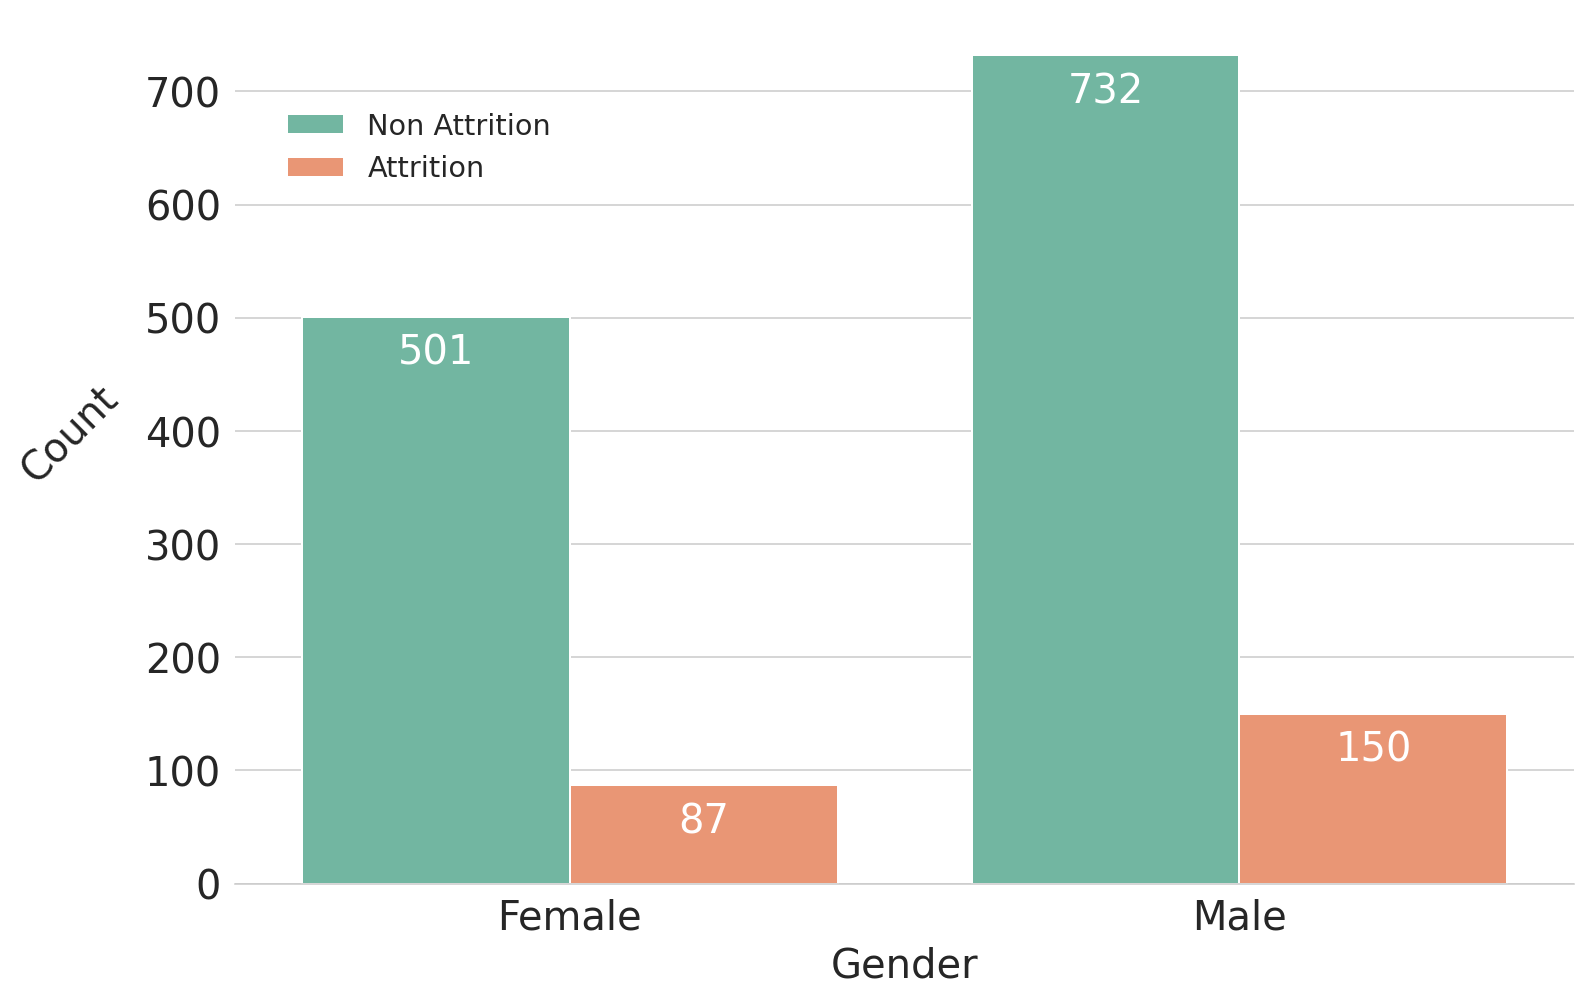

Female Attrition percentage & count
-----------------------------------
0    85.2
1    14.8
Name: attrition, dtype: float64
0    501
1     87
Name: attrition, dtype: int64
___________________________________

Male Attrition percentage & count
-----------------------------------
0    82.99
1    17.01
Name: attrition, dtype: float64
0    732
1    150
Name: attrition, dtype: int64
___________________________________


In [24]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='gender', hue='attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('Gender', fontsize=20)
plt.xticks(fontsize=20)
fig.set_ylabel('Count', fontsize=20, rotation=45)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=20)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()

print('Female Attrition percentage & count')
print('-'*35)
print(round(df[df.gender == 'Female'].attrition.value_counts(normalize=True)*100,2))
print(df[df.gender == 'Female'].attrition.value_counts())
print('_'*35)
print(''*35)
print('Male Attrition percentage & count')
print('-'*35)
print(round(df[df.gender == 'Male'].attrition.value_counts(normalize=True)*100,2))
print(df[df.gender == 'Male'].attrition.value_counts())
print('_'*35)


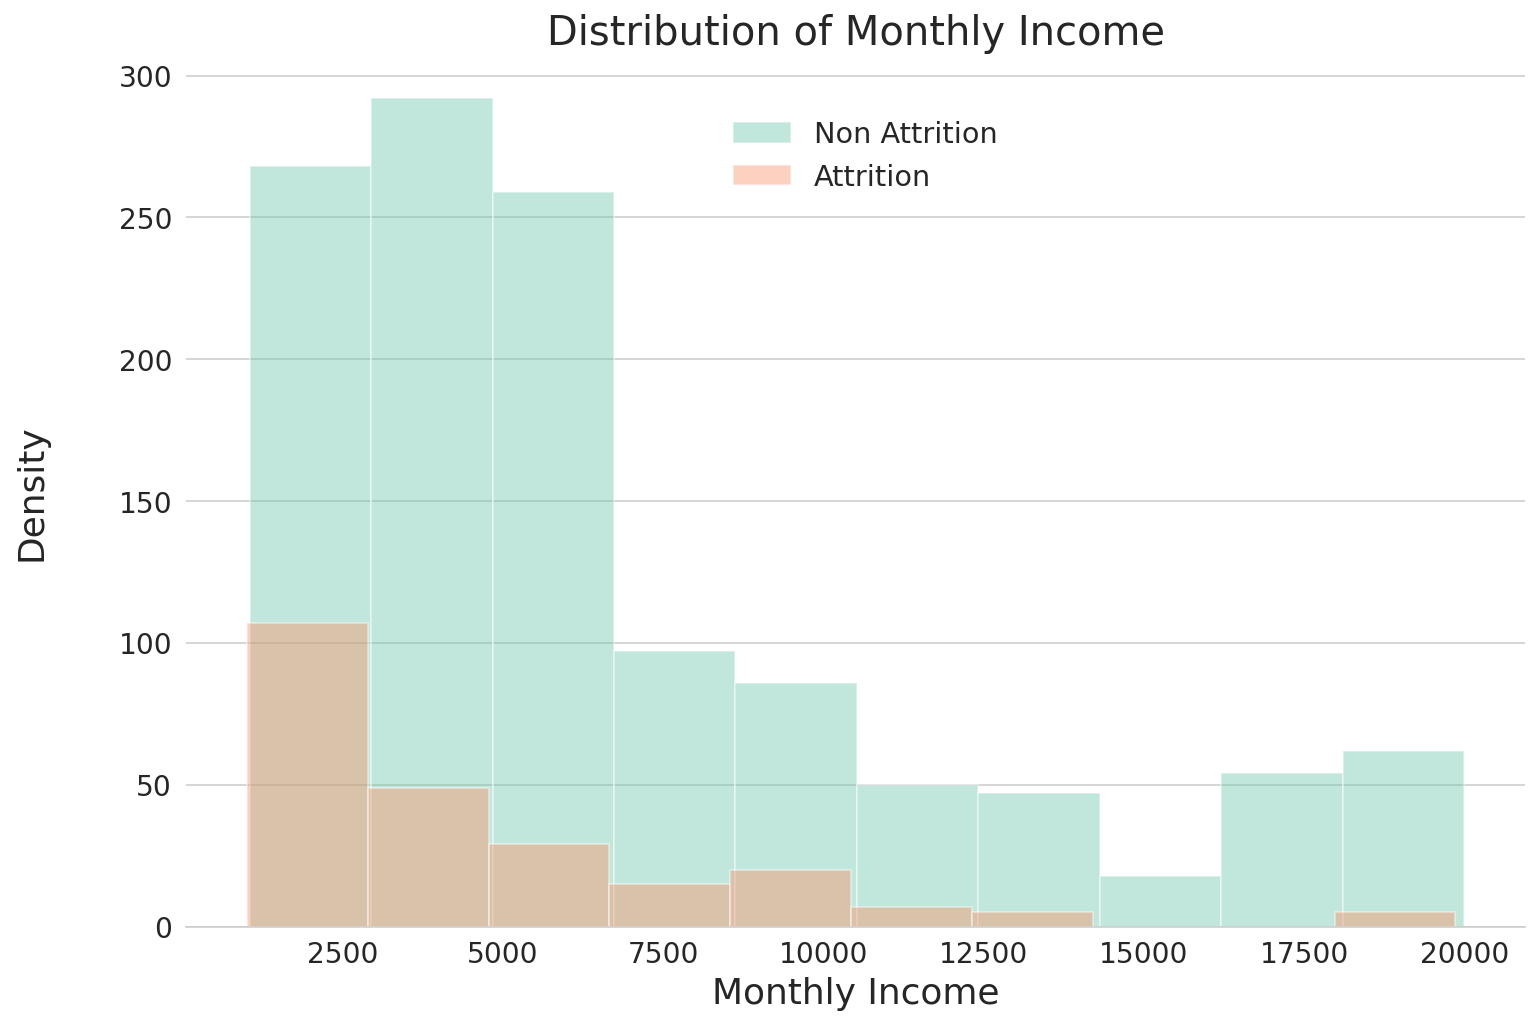

Average Monthly Income: 6502.931292517007
Average Monthly Income for Males: 6380.507936507936
Average Monthly Income for Females: 6686.566326530612


In [25]:
plt.figure(figsize=(12,8))
fig=sns.distplot(df[df['attrition']==0]['monthlyincome'],label='Non Attrition',kde=0,bins=10)
sns.distplot(df[df['attrition']!=0]['monthlyincome'],label='Attrition',kde=0,bins=10)
sns.despine(left=1)
fig.grid(axis='x')
plt.xlabel('Monthly Income',fontsize=18)
plt.ylabel('Density',fontsize=18)

fig.yaxis.labelpad=30

plt.title('Distribution of Monthly Income',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()
print('Average Monthly Income:',df.monthlyincome.mean())
print('Average Monthly Income for Males:',df[df.gender == 'Male']['monthlyincome'].mean())
print('Average Monthly Income for Females:',df[df.gender == 'Female']['monthlyincome'].mean())


In [26]:
income=df.groupby(by='jobrole').mean().monthlyincome
inc=pd.DataFrame(income)
inc=inc.sort_values(by='monthlyincome')
inc

,monthlyincome
jobrole,
Sales Representative,2626.000000
Laboratory Technician,3237.169884
Research Scientist,3239.972603
Human Resources,4235.750000
Sales Executive,6924.279141
Manufacturing Director,7295.137931
Healthcare Representative,7528.763359
Research Director,16033.550000
Manager,17181.676471


In [27]:
job_atr=df[df['attrition']==1]['jobrole']
job_atr_val = job_atr.value_counts()
job_atr_df = pd.DataFrame(job_atr_val)
job_atr_df

,jobrole
Laboratory Technician,62
Sales Executive,57
Research Scientist,47
Sales Representative,33
Human Resources,12
Manufacturing Director,10
Healthcare Representative,9
Manager,5
Research Director,2


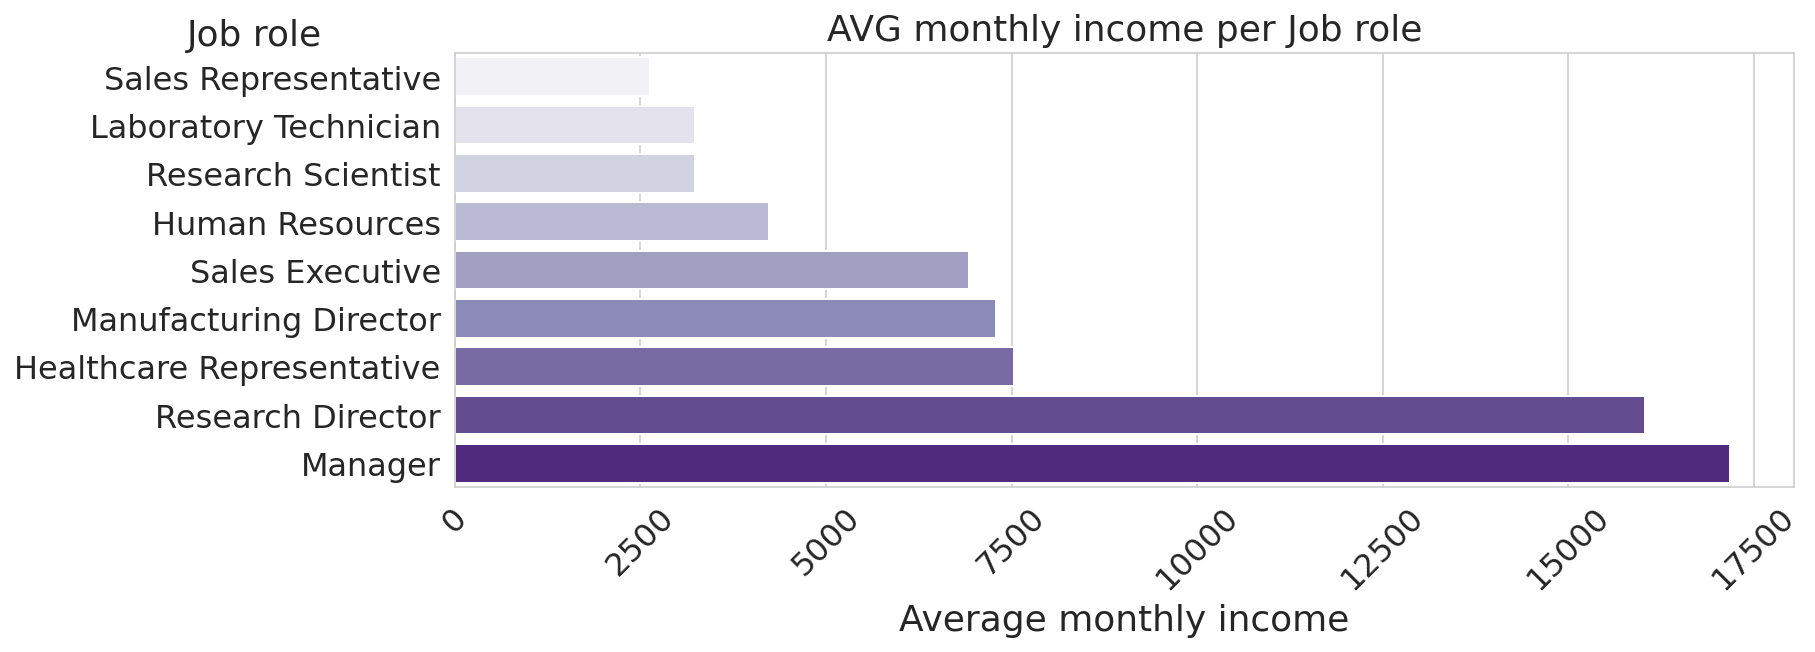

In [28]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=inc.index, x='monthlyincome', data=inc,
                  palette=sns.color_palette("Purples", n_colors=len(inc.index)))
fig.set_title('AVG monthly income per Job role',fontsize=18)
fig.set_xlabel('Average monthly income', fontsize=18)
fig.set_ylabel('Job role', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -120
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()


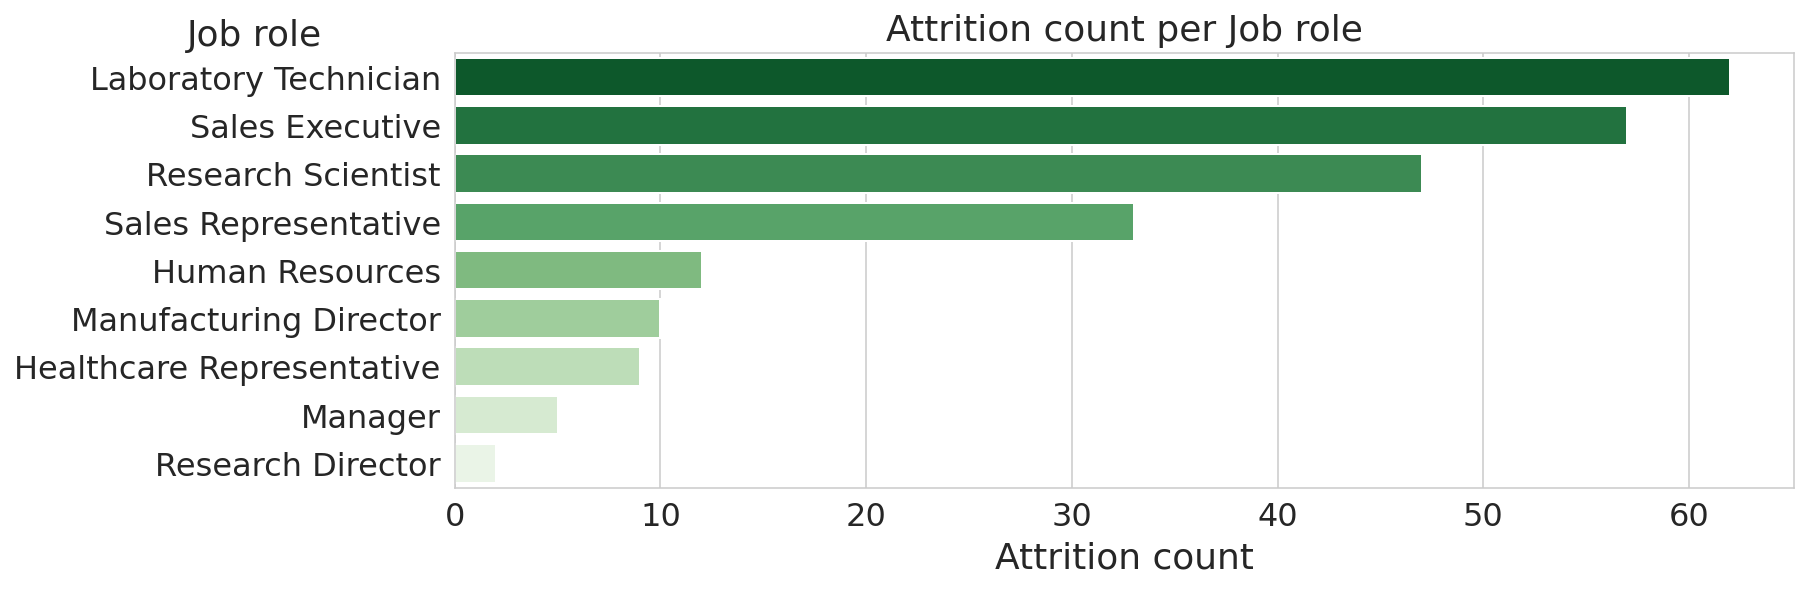

In [29]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=job_atr_df.index, x='jobrole', data=job_atr_df, 
                  palette=sns.color_palette("Greens_r", n_colors=len(job_atr_df.index)))
fig.set_title('Attrition count per Job role',fontsize=18)
fig.set_xlabel('Attrition count', fontsize=18)
fig.set_ylabel('Job role', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -120
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.show()


In [30]:
edu_sal = df.groupby('education').mean().monthlyincome
edu_sal_df=pd.DataFrame(edu_sal)
edu_sal_df = edu_sal_df.sort_values('monthlyincome', ascending=False)
edu_sal_df

,monthlyincome
education,
Doctor,8277.645833
Masters,6832.402010
Bachelor,6517.263986
College,6226.645390
Below_college,5640.570588


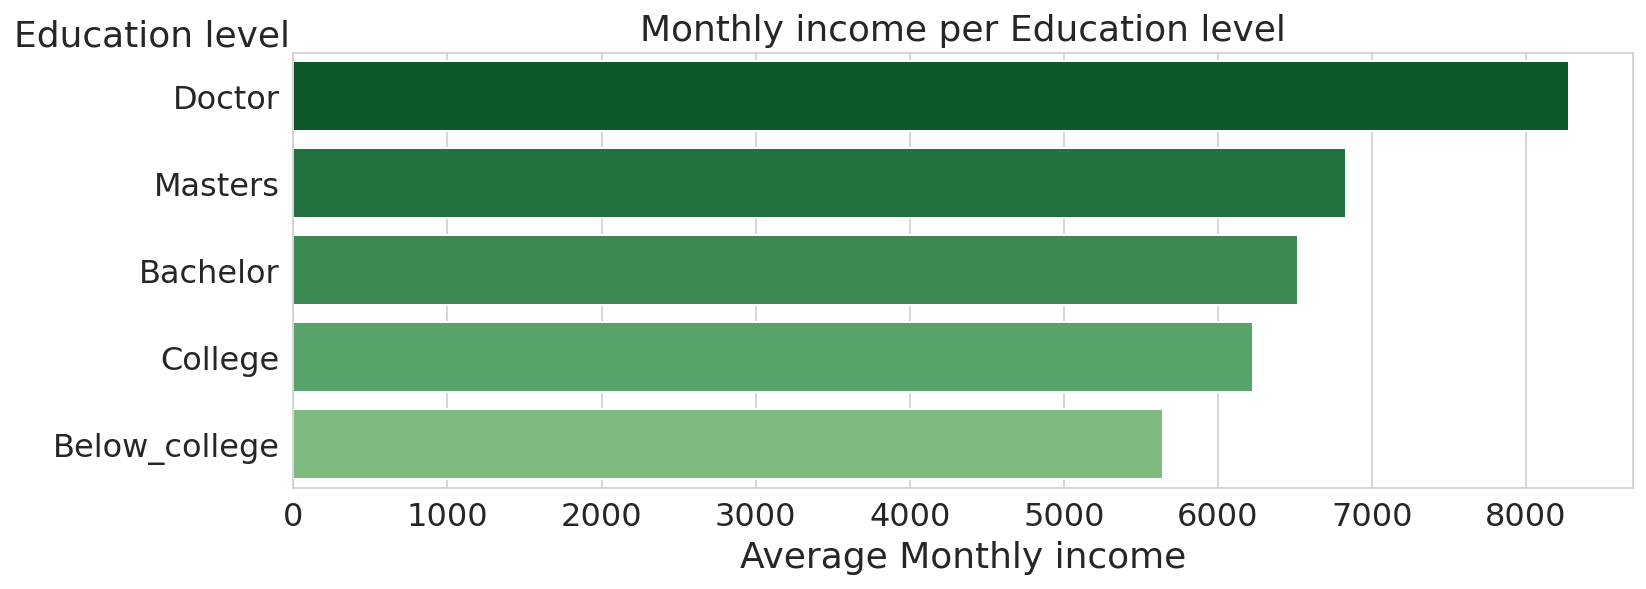

In [31]:
plt.figure(figsize=(12,4))
fig = sns.barplot(y=edu_sal_df.index, x='monthlyincome', data=edu_sal_df, 
                  palette=sns.color_palette("Greens_r", n_colors=len(job_atr_df.index)))
fig.set_title('Monthly income per Education level',fontsize=18)
fig.set_xlabel('Average Monthly income', fontsize=18)
fig.set_ylabel('Education level', fontsize=18, position=(0,1), rotation=0)
fig.yaxis.labelpad= -50
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.show()


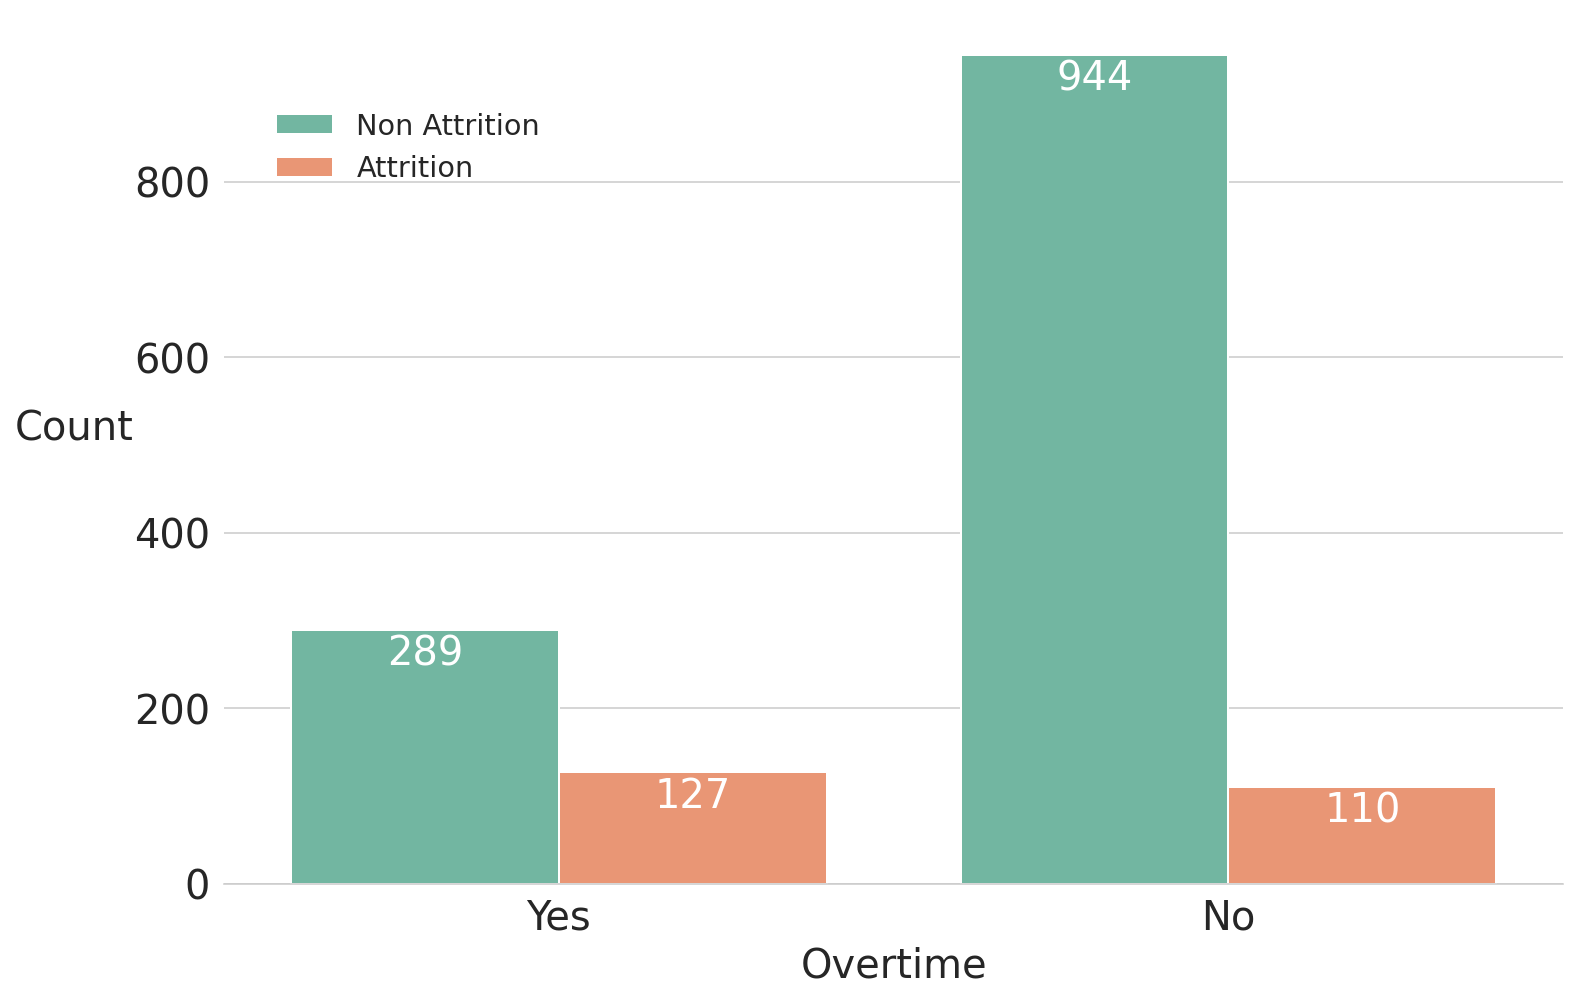

In [32]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='overtime', hue='attrition', data=df)
sns.despine(left=True)
fig.set_xlabel('Overtime', fontsize=20)
plt.xticks(fontsize=20)
fig.set_ylabel('Count', fontsize=20, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=20)
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'],fontsize='x-large', bbox_to_anchor=(0.03, 0.9), loc=2, borderaxespad=0., frameon=0)
plt.show()


In [33]:
df = df_dum
df.shape
df.astype(float)

,age,dailyrate,distancefromhome,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_yes,businesstravel_non-travel,businesstravel_travel_frequently,businesstravel_travel_rarely,department_human resources,department_research & development,department_sales,education_bachelor,education_below_college,education_college,education_doctor,education_masters,educationfield_human resources,educationfield_life sciences,educationfield_marketing,educationfield_medical,educationfield_other,educationfield_technical degree,gender_male,jobrole_healthcare representative,jobrole_human resources,jobrole_laboratory technician,jobrole_manager,jobrole_manufacturing director,jobrole_research director,jobrole_research scientist,jobrole_sales executive,jobrole_sales representative,maritalstatus_divorced,maritalstatus_married,maritalstatus_single,overtime_yes
0,41.0,1102.0,1.0,2.0,94.0,3.0,2.0,4.0,5993.0,19479.0,8.0,11.0,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,49.0,279.0,8.0,3.0,61.0,2.0,2.0,2.0,5130.0,24907.0,1.0,23.0,4.0,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37.0,1373.0,2.0,4.0,92.0,2.0,1.0,3.0,2090.0,2396.0,6.0,15.0,3.0,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33.0,1392.0,3.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,11.0,3.0,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,27.0,591.0,2.0,1.0,40.0,3.0,1.0,2.0,3468.0,16632.0,9.0,12.0,3.0,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,3.0,41.0,4.0,2.0,4.0,2571.0,12290.0,4.0,17.0,3.0,3.0,80.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39.0,613.0,6.0,4.0,42.0,2.0,3.0,1.0,9991.0,21457.0,4.0,15.0,3.0,1.0,80.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27.0,155.0,4.0,2.0,87.0,4.0,2.0,2.0,6142.0,5174.0,1.0,20.0,4.0,2.0,80.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49.0,1023.0,2.0,4.0,63.0,2.0,2.0,2.0,5390.0,13243.0,2.0,14.0,3.0,4.0,80.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
df.rename({'attrition_yes':'attrition'}, axis=1, inplace=True)


In [35]:
""" Seperate dataframe into the target and features. """
X = df.drop('attrition', axis=1)
y = df.attrition


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1176, 54)
(294, 54)
(1176,)
(294,)


In [37]:
y.value_counts(normalize=True)


0    0.838776
1    0.161224
Name: attrition, dtype: float64

In [39]:
# Defining the models i am going to use into a list
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]
    

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

# Iterate through each classification model stated above, fitting the model to the train data and finally    printing the accuracy and log loss of each model

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('Results')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    
    from sklearn.metrics import confusion_matrix
    ca=confusion_matrix(train_predictions,y_test)
    print(ca)
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

    
print("="*30)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
Results
Accuracy: 85.7143%
[[251  42]
 [  0   1]]
Log Loss: 0.38483330610606814
KNeighborsClassifier
Results
Accuracy: 79.5918%
[[225  34]
 [ 26   9]]
Log Loss: 2.716224716528208
SVC
Results
Accuracy: 85.3741%
[[251  43]
 [  0   0]]
Log Loss: 0.4158663706344619
DecisionTreeClassifier
Results
Accuracy: 80.9524%
[[220  25]
 [ 31  18]]
Log Loss: 6.578814551411559
RandomForestClassifier
Results
Accuracy: 88.0952%
[[250  34]
 [  1   9]]
Log Loss: 0.3502011153577387
XGBClassifier
Results
Accuracy: 87.7551%
[[243  28]
 [  8  15]]
Log Loss: 0.3142235663269653
AdaBoostClassifier
Results
Accuracy: 87.4150%
[[244  30]
 [  7  13]]
Log Loss: 0.659287261593301
GradientBoostingClassifier
Results
Accuracy: 87.7551%
[[243  28]
 [  8  15]]
Log Loss: 0.31539730137183114
GaussianNB
Results
Accuracy: 76.1905%
[[196  15]
 [ 55  28]]
Log Loss: 0.6086910973868418


In [40]:
log1 = log.sort_values(by='Accuracy',ascending=False)
log2 = log.sort_values(by='Log Loss')


In [41]:
log1

,Classifier,Accuracy,Log Loss
0,RandomForestClassifier,88.095238,0.350201
0,XGBClassifier,87.755102,0.314224
0,GradientBoostingClassifier,87.755102,0.315397
0,AdaBoostClassifier,87.414966,0.659287
0,LogisticRegression,85.714286,0.384833
0,SVC,85.374150,0.415866
0,DecisionTreeClassifier,80.952381,6.578815
0,KNeighborsClassifier,79.591837,2.716225
0,GaussianNB,76.190476,0.608691


In [42]:
log2

,Classifier,Accuracy,Log Loss
0,XGBClassifier,87.755102,0.314224
0,GradientBoostingClassifier,87.755102,0.315397
0,RandomForestClassifier,88.095238,0.350201
0,LogisticRegression,85.714286,0.384833
0,SVC,85.374150,0.415866
0,GaussianNB,76.190476,0.608691
0,AdaBoostClassifier,87.414966,0.659287
0,KNeighborsClassifier,79.591837,2.716225
0,DecisionTreeClassifier,80.952381,6.578815


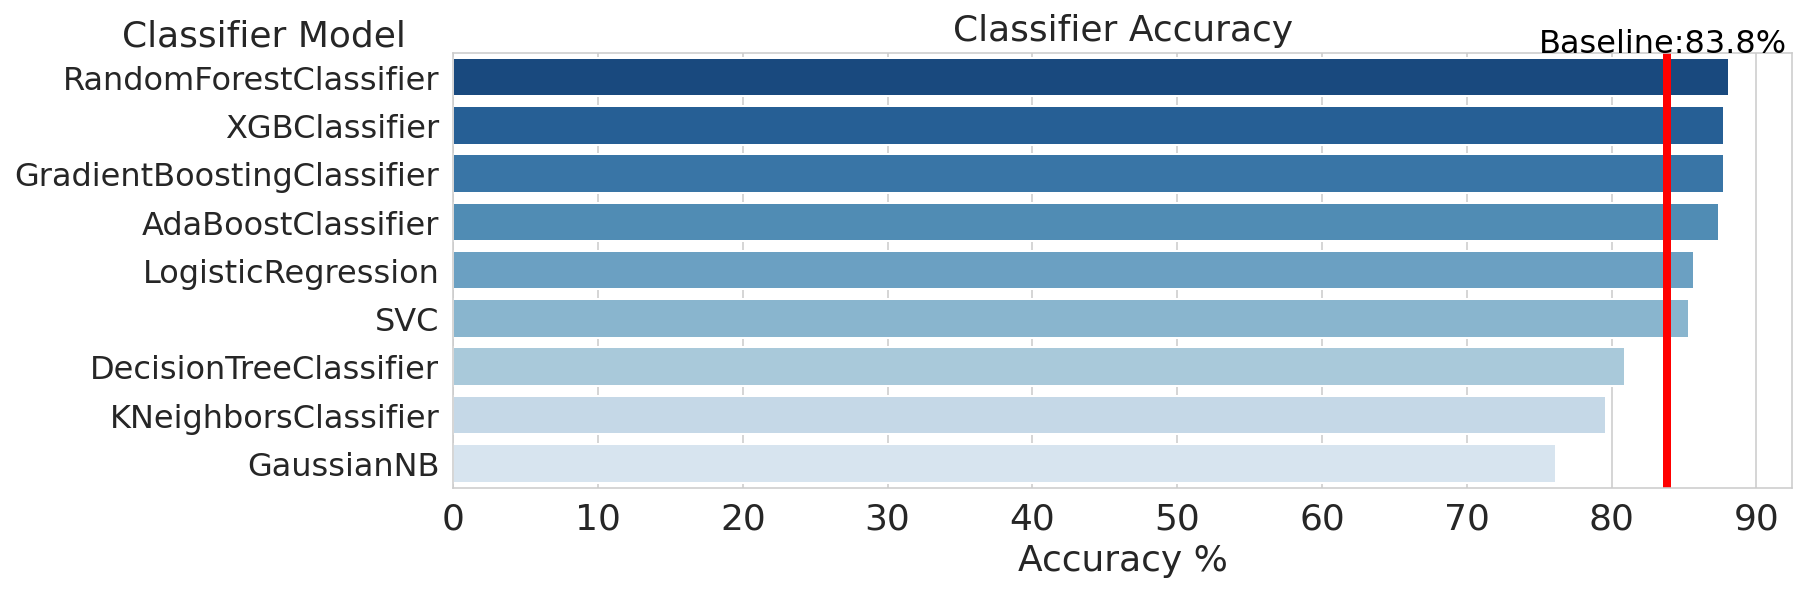

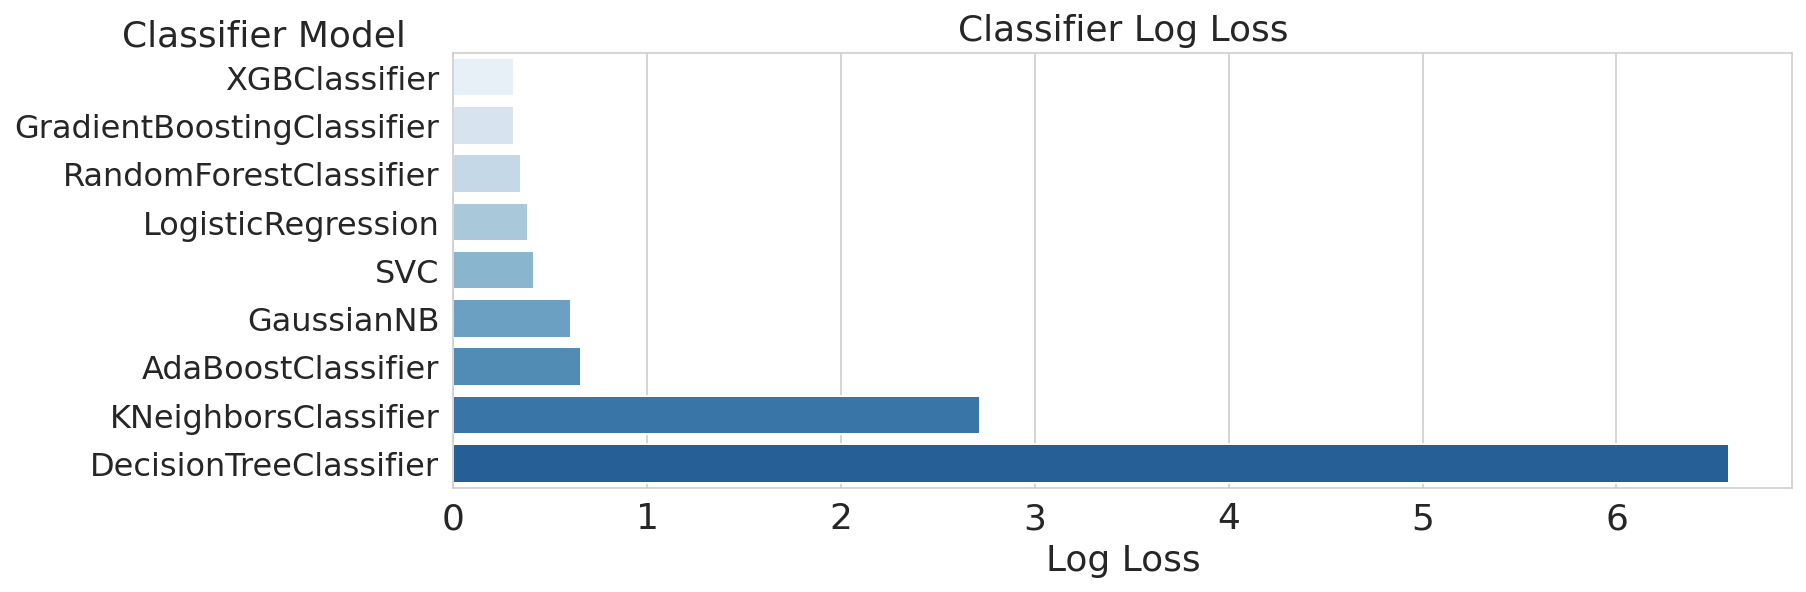

In [43]:
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
plt.annotate(s='Baseline:83.8%', xy=(75,-0.5), fontsize=16, color='black')
plt.show()

plt.figure(figsize=(12,4))
fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))
plt.xlabel('Log Loss', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Log Loss', fontsize=18)
plt.show()


In [44]:
#best model result
model=XGBClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)


In [45]:
va=pd.DataFrame({'preiction':y_predict,'True_val':y_test})
va.head(50)

,preiction,True_val
325,0,0
1165,0,0
1153,1,1
1403,0,0
1019,0,0
747,0,0
462,0,0
616,0,0
144,0,0
230,0,0
